<a href="https://colab.research.google.com/github/MateusRsousa/Analise_sentimento_Tweets/blob/main/Trabalho2_MateusSousa_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 (Mateus Ribeiro de Sousa) (19205642)

#  1- Carregamento dos dados e EDA inicial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay




In [ ]:
df = pd.read_csv('Tweets.csv')
df


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
df['target'] = np.where(df['sentiment'] == 'negative', 1, 0)
df.head()

,textID,text,selected_text,sentiment,target
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,1


In [ ]:
df.isnull().sum()


textID           0
text             1
selected_text    1
sentiment        0
target           0
dtype: int64

In [ ]:
df.duplicated().sum()


0

 ##
 até aqui foi feita uma análise do dataset, temos uma coluna chamada textID, text, selected_text , sentiment e a coluna criada target.
 Não possuimos dados duplicados , mas temos 1 dado faltante.



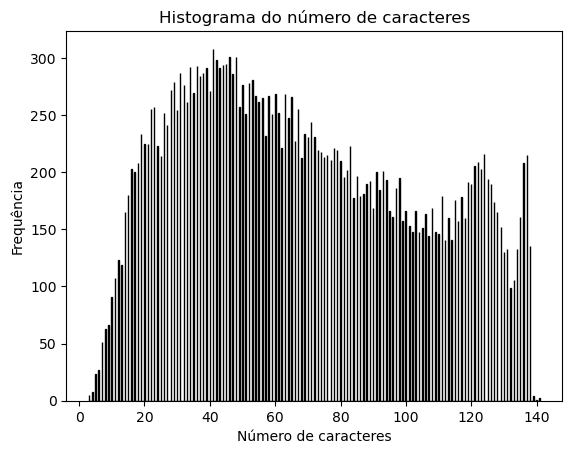

In [ ]:

df['num_caracteres'] = df['text'].str.len()


plt.hist(df['num_caracteres'], bins=1000, edgecolor='black')
plt.title('Histograma do número de caracteres')
plt.xlabel('Número de caracteres')
plt.ylabel('Frequência')
plt.show()


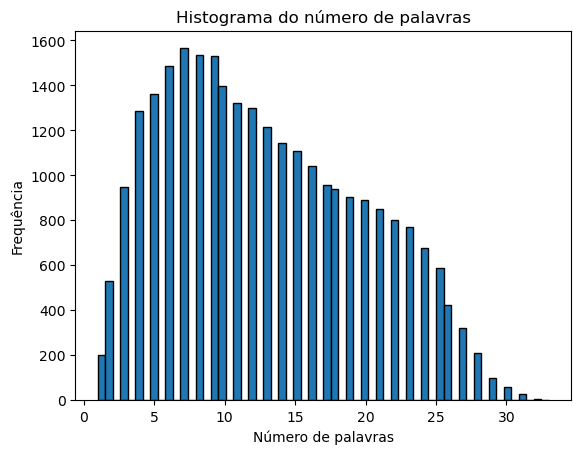

In [ ]:
df['num_palavras'] = df['text'].str.split().str.len()
plt.hist(df['num_palavras'], bins=60, edgecolor='black')
plt.title('Histograma do número de palavras')
plt.xlabel('Número de palavras')
plt.ylabel('Frequência')
plt.show()

In [ ]:
maiores = df.loc[df['text'].str.len().nlargest(5).index][['text', 'sentiment']]
maiores


,text,sentiment
3138,Is so freaking bored on the bus. Hate being po...,negative
27318,just saw an advert for ATTICS TO EDEN on tv o...,neutral
13896,Feeling madly sorry for myself... - ï¿½Iï¿½M S...,negative
2582,TODAy SUCKs - kisskass19: ï¿½you and katey bro...,negative
12456,Have ordered the cuuutest invitations for my n...,neutral


In [ ]:
menores = df.loc[df['text'].str.len().nsmallest(5).index][['text', 'sentiment']]
menores

,text,sentiment
641,no,neutral
11524,aw,neutral
14339,ow,neutral
25699,ME,neutral
26005,?,neutral


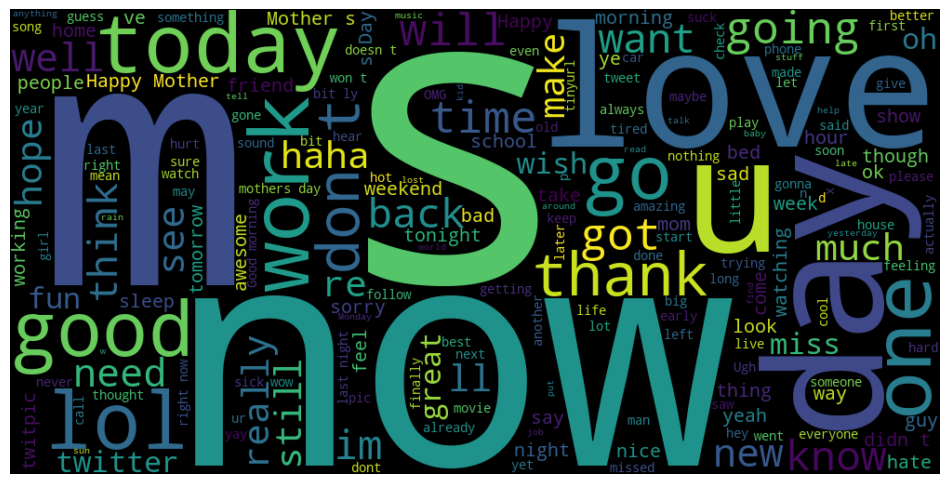

In [ ]:
texto = ' '.join(review for review in df['text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(texto)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

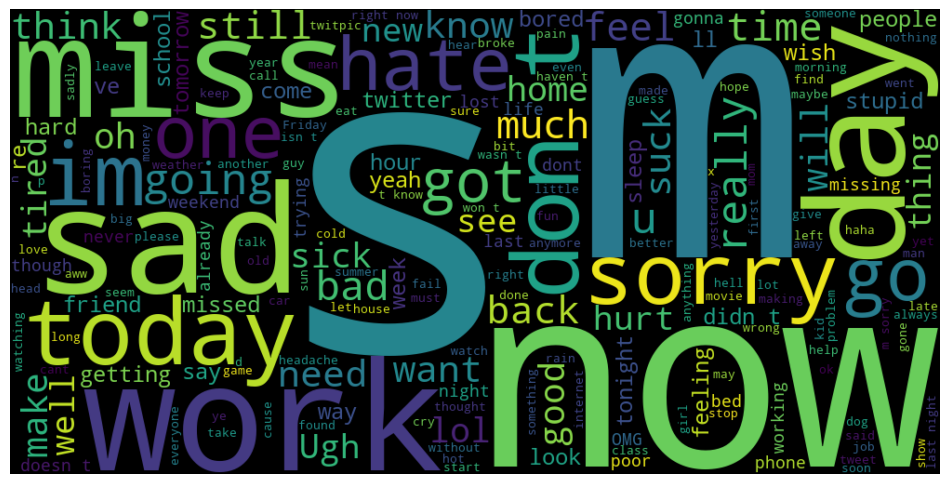

In [ ]:
negativo = df[df['sentiment'] == 'negative']
textonegativo = ' '.join(review for review in negativo['text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(textonegativo)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

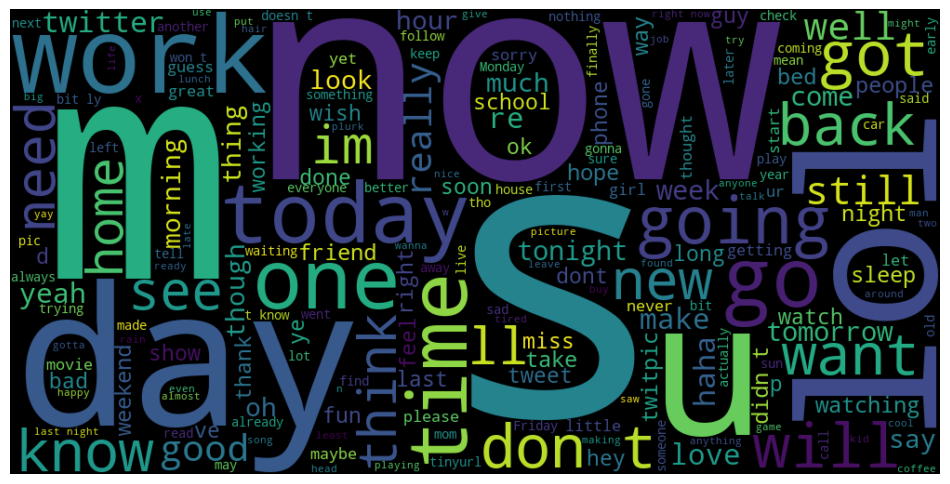

In [ ]:
neutro = df[df['sentiment'] == 'neutral']
textoneutro = ' '.join(review for review in neutro['text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(textoneutro)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

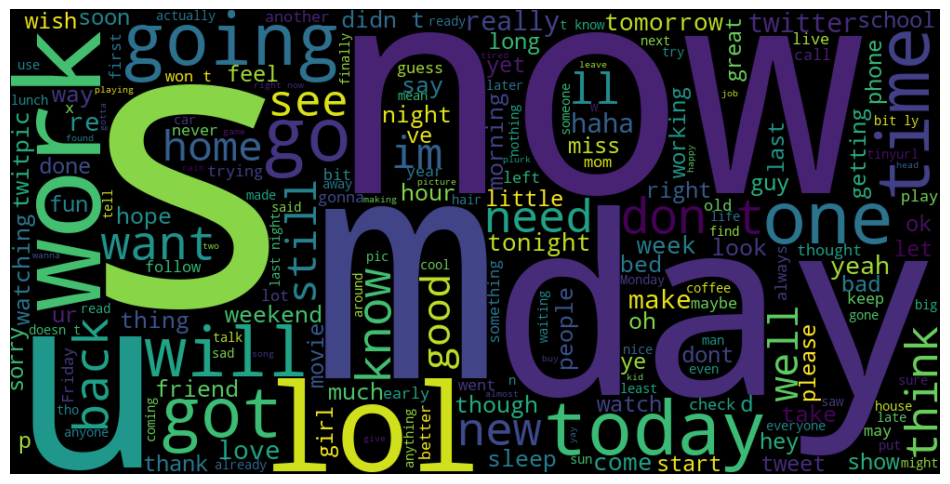

In [ ]:
positive = df[df['sentiment'] == 'neutral']
textopositivo = ' '.join(review for review in positive['text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(textopositivo)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

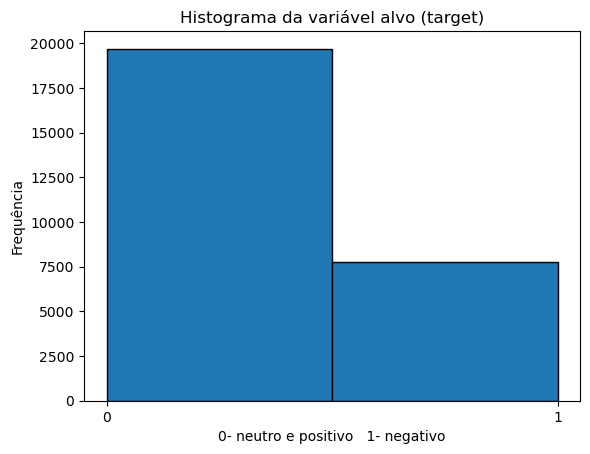

In [ ]:
plt.hist(df['target'], bins=2, edgecolor='black')
plt.title('Histograma da variável alvo (target)')
plt.xticks([0, 1])
plt.xlabel('0- neutro e positivo   1- negativo')
plt.ylabel('Frequência')
plt.show()

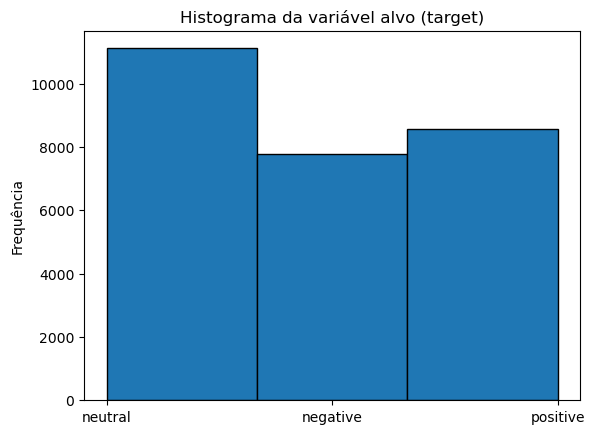

In [ ]:
plt.hist(df['sentiment'], bins=3, edgecolor='black')
plt.title('Histograma da variável alvo (target)')
plt.ylabel('Frequência')
plt.show()

Levando em conta esse desbalanceamento dos dados a métrica utilizada será a acurrácia balanceada.

# 2- Limpeza e separação dos dados

In [ ]:
df = df.dropna(subset=['text'])
df.isnull().sum()


textID            0
text              0
selected_text     0
sentiment         0
target            0
num_caracteres    0
num_palavras      0
dtype: int64

In [ ]:
df = df[['text', 'target']]
df


,text,target
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...",1
...,...,...
27476,wish we could come see u on Denver husband l...,1
27477,I`ve wondered about rake to. The client has ...,1
27478,Yay good for both of you. Enjoy the break - y...,0
27479,But it was worth it ****.,0


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df['text'], df['target'], test_size=0.20, stratify=df['target'], random_state=42)
print(f"X_train: {X_train_val.shape} | y_train: {y_train_val.shape}")
print(f"X_test:  {X_test.shape} | y_test:  {y_test.shape}")

X_train: (21984,) | y_train: (21984,)
X_test:  (5496,) | y_test:  (5496,)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.20, stratify=y_train_val, random_state=42)
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_val:  {X_val.shape} | y_val:  {y_val.shape}")

X_train: (17587,) | y_train: (17587,)
X_val:  (4397,) | y_val:  (4397,)


 Aqui o conjunto foi separado 64% para treino 16% para validação e 20% para teste

# 3 - Seleção de hiperparâmetros


In [ ]:
pipeline_process = Pipeline([
    ('vectorizer', CountVectorizer())
])

## regressão logística

In [ ]:
model_Regression = Pipeline([('preprocessing', pipeline_process), ('model', LogisticRegression(max_iter=500))])
model_Regression.fit(X_train, y_train)

y_train_pred = model_Regression.predict(X_train)
y_val_pred = model_Regression.predict(X_val)


balanced_acc_train = balanced_accuracy_score(y_train, y_train_pred)
print(f"Acurácia balanceada no conjunto de teste: {balanced_acc_train:.4f}")
balanced_acc_val = balanced_accuracy_score(y_val, y_val_pred)
print(f"Acurácia balanceada no conjunto de validação: {balanced_acc_val:.4f}")

Acurácia balanceada no conjunto de teste: 0.8904
Acurácia balanceada no conjunto de validação: 0.7502


In [ ]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs']
}


grid = GridSearchCV(
    model_Regression,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    verbose=1,
    n_jobs=-1
)


grid.fit(X_train, y_train)


print("Melhores parâmetros encontrados:")
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhores parâmetros encontrados:
{'model__C': 10, 'model__solver': 'lbfgs'}


## svm

In [ ]:
model_svm = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', SVC(kernel='rbf'))
])


model_svm.fit(X_train, y_train)


y_train_pred_svm = model_svm.predict(X_train)
y_val_pred_svm = model_svm.predict(X_val)




balanced_acc_svm_train = balanced_accuracy_score(y_train, y_train_pred_svm)
print(f"Acurácia balanceada com SVM (RBF): {balanced_acc_svm_train:.4f}")


balanced_acc_svm_val = balanced_accuracy_score(y_val, y_val_pred_svm)
print(f"Acurácia balanceada na validação: {balanced_acc_svm_val:.4f}")


Acurácia balanceada com SVM (RBF): 0.8886
Acurácia balanceada na validação: 0.6884


In [ ]:
# Grid de hiperparâmetros para SVC
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__gamma': ['scale', 'auto']
}

# GridSearchCV
grid = GridSearchCV(
    model_svm,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    verbose=1,
    n_jobs=-1  # usa todos os núcleos disponíveis
)

# Ajuste apenas para encontrar os melhores hiperparâmetros
grid.fit(X_train, y_train)

# Apenas mostra os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhores parâmetros encontrados:
{'model__C': 10, 'model__gamma': 'scale'}


## Árvore de decisão

In [ ]:

model_tree = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', DecisionTreeClassifier(random_state=42))
])

# Treinamento
model_tree.fit(X_train, y_train)

# Predição
y_train_pred_tree = model_tree.predict(X_train)
y_val_pred_tree = model_tree.predict(X_val)

# Avaliação
balanced_acc_tree_train = balanced_accuracy_score(y_train, y_train_pred_tree)
print(f"Acurácia balanceada com Árvore (treino): {balanced_acc_tree_train:.4f}")

balanced_acc_tree_val = balanced_accuracy_score(y_val, y_val_pred_tree)
print(f"Acurácia balanceada com Árvore (validação): {balanced_acc_tree_val:.4f}")


Acurácia balanceada com Árvore (treino): 0.9997
Acurácia balanceada com Árvore (validação): 0.7155


In [ ]:
param_grid = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['gini', 'entropy']
}


grid = GridSearchCV(
    model_tree,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    verbose=1,
    n_jobs=-1
)


grid.fit(X_train, y_train)


print("Melhores parâmetros encontrados:")
print(grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros encontrados:
{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}


## Floresta Aleatória

In [ ]:
model_rf = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Treinamento
model_rf.fit(X_train, y_train)

# Predição
y_train_pred_rf = model_rf.predict(X_train)
y_val_pred_rf = model_rf.predict(X_val)

# Avaliação
balanced_acc_rf_train = balanced_accuracy_score(y_train, y_train_pred_rf)
print(f"Acurácia balanceada com Random Forest (treino): {balanced_acc_rf_train:.4f}")

balanced_acc_rf_val = balanced_accuracy_score(y_val, y_val_pred_rf)
print(f"Acurácia balanceada com Random Forest (validação): {balanced_acc_rf_val:.4f}")


Acurácia balanceada com Random Forest (treino): 0.9997
Acurácia balanceada com Random Forest (validação): 0.7103


In [ ]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__criterion': ['gini', 'entropy']
}

# GridSearchCV
grid = GridSearchCV(
    model_rf,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    verbose=1,
    n_jobs=-1
)


grid.fit(X_train, y_train)


print("Melhores parâmetros encontrados:")
print(grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Melhores parâmetros encontrados:
{'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


## gradiente boosting

In [ ]:
model_gb = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', GradientBoostingClassifier(random_state=42))
])


model_gb.fit(X_train, y_train)


y_train_pred_gb = model_gb.predict(X_train)
y_val_pred_gb = model_gb.predict(X_val)


balanced_acc_gb_train = balanced_accuracy_score(y_train, y_train_pred_gb)
print(f"Acurácia balanceada com Gradient Boosting (treino): {balanced_acc_gb_train:.4f}")

balanced_acc_gb_val = balanced_accuracy_score(y_val, y_val_pred_gb)
print(f"Acurácia balanceada com Gradient Boosting (validação): {balanced_acc_gb_val:.4f}")

Acurácia balanceada com Gradient Boosting (treino): 0.6506
Acurácia balanceada com Gradient Boosting (validação): 0.6472


In [ ]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}


grid = GridSearchCV(
    model_gb,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',
    verbose=1,
    n_jobs=-1
)


grid.fit(X_train, y_train)

# Exibir os melhores parâmetros
print("Melhores parâmetros encontrados:")
print(grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores parâmetros encontrados:
{'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 200}


aqui os resultados sem seleção de hiperparâmetros foram:

Regressão logística:

Acurácia balanceada no conjunto de teste: 0.8904
Acurácia balanceada no conjunto de validação: 0.7502

SVM:

Acurácia balanceada com SVM (RBF): 0.8886
Acurácia balanceada na validação: 0.6884

Árvore de decisão:

Acurácia balanceada com Árvore (treino): 0.9997
Acurácia balanceada com Árvore (validação): 0.7155

Floresta Aleatória:

Acurácia balanceada com Random Forest (treino): 0.9997
Acurácia balanceada com Random Forest (validação): 0.7103

Gradient Boosting:

Acurácia balanceada com Gradient Boosting (treino): 0.6506
Acurácia balanceada com Gradient Boosting (validação): 0.6472

A desição de melhor modelo foi tomada com a acurácia no conjunto de validação, que foi a regressão logística.







# 4-  Retreinamento e resultados no conjunto de teste

## Regressão Logística

In [ ]:
# Juntar treino + validação
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)


model_Regression_final = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', LogisticRegression(
        C=10,
        solver='lbfgs',
        max_iter=500,
        random_state=42
    ))
])

# Treinamento com treino+validação
model_Regression_final.fit(X_train_val, y_train_val)

# Avaliação no conjunto de teste
y_test_pred = model_Regression_final.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)

print(f"Acurácia balanceada no conjunto de teste: {balanced_acc_test:.4f}")


Acurácia balanceada no conjunto de teste: 0.7545


## SVM

In [ ]:
model_svm_final = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        random_state=42








    ))
])

# Treinamento com treino+validação
model_svm_final.fit(X_train_val, y_train_val)

# Avaliação no conjunto de teste
y_test_pred_svm = model_svm_final.predict(X_test)
balanced_acc_test_svm = balanced_accuracy_score(y_test, y_test_pred_svm)

print(f"Acurácia balanceada no conjunto de teste (SVM): {balanced_acc_test_svm:.4f}")


Acurácia balanceada no conjunto de teste (SVM): 0.7524


## Árvore de decissão

In [ ]:

model_tree_final = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=10,
        random_state=42
    ))
])


model_tree_final.fit(X_train_val, y_train_val)


y_test_pred_tree = model_tree_final.predict(X_test)


balanced_acc_tree_test = balanced_accuracy_score(y_test, y_test_pred_tree)
print(f"Acurácia balanceada no conjunto de teste (Árvore): {balanced_acc_tree_test:.4f}")


Acurácia balanceada no conjunto de teste (Árvore): 0.7194


## Floresta Aleatória

In [ ]:
model_rf_final = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', RandomForestClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


model_rf_final.fit(X_train_val, y_train_val)


y_test_pred_rf = model_rf_final.predict(X_test)


balanced_acc_rf_test = balanced_accuracy_score(y_test, y_test_pred_rf)
print(f"Acurácia balanceada no conjunto de teste (Random Forest): {balanced_acc_rf_test:.4f}")


Acurácia balanceada no conjunto de teste (Random Forest): 0.7105


## Gradient Boosting

In [ ]:
model_gb_final = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', GradientBoostingClassifier(
        learning_rate=0.2,
        max_depth=7,
        n_estimators=200,
        random_state=42
    ))
])


model_gb_final.fit(X_train_val, y_train_val)

y_test_pred_gb = model_gb_final.predict(X_test)

balanced_acc_gb_test = balanced_accuracy_score(y_test, y_test_pred_gb)
print(f"Acurácia balanceada no conjunto de teste (Gradient Boosting): {balanced_acc_gb_test:.4f}")


Acurácia balanceada no conjunto de teste (Gradient Boosting): 0.7342


Todos os modelos foram retreinados mas agora com a seleção dos melhores hiperparâmetros indicados pelo GridSearch, e foram treinados com o conjunto de teste+validação para aumentar
o número de dados no treinamento. O método de regressão logística continuou sendo o melhor, mas vale destacar o svm que com os melhores hiperparâmetros também apresento uma acurácia semelhante.

# 5 - Análise de resultados


Acurácia balanceada no conjunto de teste: 0.7545


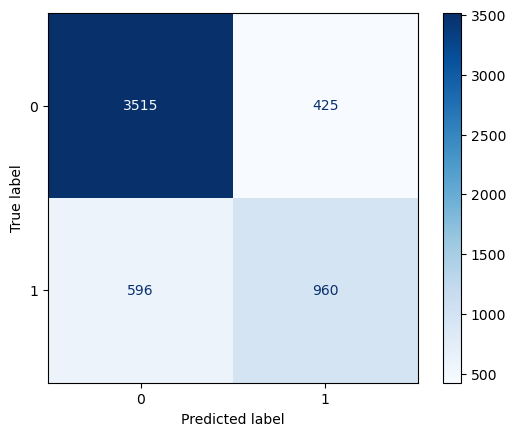

In [ ]:
## melhor modelo

# Juntar treino + validação
X_train_val = np.concatenate((X_train, X_val), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)


model_Regression_final = Pipeline([
    ('preprocessing', pipeline_process),
    ('model', LogisticRegression(
        C=10,
        solver='lbfgs',
        max_iter=500,
        random_state=42
    ))
])

# Treinamento com treino+validação
model_Regression_final.fit(X_train_val, y_train_val)

# Avaliação no conjunto de teste
y_test_pred = model_Regression_final.predict(X_test)
balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)

print(f"Acurácia balanceada no conjunto de teste: {balanced_acc_test:.4f}")

cm = confusion_matrix(y_test, y_test_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


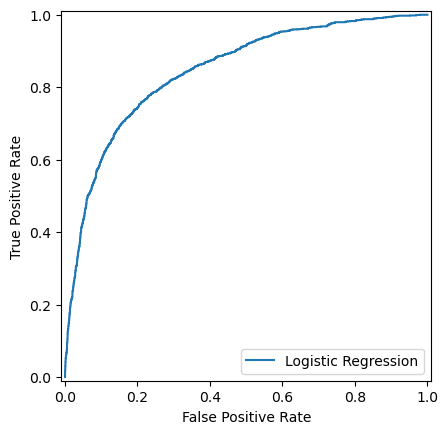

In [ ]:
y_test_proba = model_Regression_final.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)


roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name="Logistic Regression")
roc_display.plot()


In [ ]:
feature_names = model_rf_final.named_steps['preprocessing'].get_feature_names_out()

importances = model_rf_final.named_steps['model'].feature_importances_


feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})


top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)


print(top_features)


      feature  importance
13503    miss    0.016097
17478     sad    0.014794
18802   sorry    0.011684
9950     hate    0.011573
3111      bad    0.008378
19437   sucks    0.007613
18247    sick    0.007066
14429     not    0.006700
13941      my    0.006445
20424      to    0.006175


In [ ]:

erros_idx = np.where(y_test != y_test_pred_rf)[0]


np.random.seed(42)
amostra_erros = np.random.choice(erros_idx, size=5, replace=False)


for idx in amostra_erros:
    print(f"Tweet: {df.iloc[idx]['text']}")
    print(f"Classe real: {y_test.iloc[idx]}")
    print(f"Classe predita: {y_test_pred_rf[idx]}")
    print("-" * 80)


Tweet: Cried my eyes out watching My Girl last period   hahah
Classe real: 1
Classe predita: 0
--------------------------------------------------------------------------------
Tweet: Hoping that this will just heal on it`s own because anything I put on it just makes it worse. Owww
Classe real: 1
Classe predita: 0
--------------------------------------------------------------------------------
Tweet: 6789998212 haha love soulja boys new song
Classe real: 0
Classe predita: 1
--------------------------------------------------------------------------------
Tweet:  I meant you are not lazy, your work proves it
Classe real: 0
Classe predita: 1
--------------------------------------------------------------------------------
Tweet: Another Lake Park kid is going to Tulane. I`m not unique anymore
Classe real: 1
Classe predita: 0
--------------------------------------------------------------------------------


Neste trabalho foi interessante aprender a trabalhar com um conjunto de dados diferente dos numéricos, entendendo como podemos tratar esse tipo de dado, no caso deste trabalho usamos o Bag of Words.
também foi interessante treinar vários modelos e ajustar os hiperparâmtros de todos eles, aprendendo a usar o GridSearchCV, que durante o trabalho surgiu alguns problemas como a demora pra rodar um modelo com vários hiperparâmetros, ou seja, eles devem ser bem escolhidos.

Fazendo uma análise do desempenho do modelo, no meu ver é de certa dificuldade fazer a predição de humor de tweets, tendo em vista que as vezes uma mesma palavra pode significar várias coisas dependendo do contextro, e em uma mesma frase pode aparecer palavras tanto dando ideia de negatividade quanto positividade, então uma acurrácia balanceada de 75% ja é algo, não é um chute aleatório que seria 50%, mas esta longe de realizar a predição correta em todos os casos.

